*House price prediction is a significant financial decision for individuals working in the housing market as well as for potential buyers. House prices can be predicted by the given explanatory variables that cover many aspects of residential houses. The goal of this notebook is to create a regression model that is able to accurately estimate the price of the house given the features.*

## **Loading libraries and data**

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('train_house.csv')
test = pd.read_csv('test_house.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

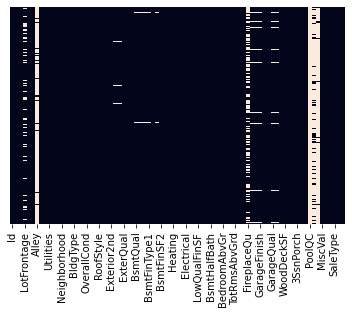

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [8]:
train.isnull().sum().sort_values(ascending = False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

Some features have missing values.

### **Data Preprocessing**

**Missing Values**

There are many missing values in various columns. We need to impute some of them. Let's check missing value percentages.

In [9]:
features=[features for features in train.columns if train[features].isnull().sum()>1]
for feature in features:
    print(feature, np.round(train[feature].isnull().mean(), 4),  ' % missing values.\n')

LotFrontage 0.1774  % missing values.

Alley 0.9377  % missing values.

MasVnrType 0.0055  % missing values.

MasVnrArea 0.0055  % missing values.

BsmtQual 0.0253  % missing values.

BsmtCond 0.0253  % missing values.

BsmtExposure 0.026  % missing values.

BsmtFinType1 0.0253  % missing values.

BsmtFinType2 0.026  % missing values.

FireplaceQu 0.4726  % missing values.

GarageType 0.0555  % missing values.

GarageYrBlt 0.0555  % missing values.

GarageFinish 0.0555  % missing values.

GarageQual 0.0555  % missing values.

GarageCond 0.0555  % missing values.

PoolQC 0.9952  % missing values.

Fence 0.8075  % missing values.

MiscFeature 0.963  % missing values.



In [10]:
#remove features with more than 20 percent missing values.
train=train.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],1)
#remove ID column since it has unique values which are not important to our predicitive model.
train=train.drop(['Id'],1)

In [11]:
test=test.drop(['MiscFeature','Fence','PoolQC','FireplaceQu','Alley'],1)
#remove ID column since it has unique values which are not important to our predicitive model.
test=test.drop(['Id'],1)

There are numerical and categorical variables in this dataset. So lets first see some descriptive statistics about categorical variables.

In [12]:
categorical_cols_train= train.select_dtypes(include=['object'])

print(f'The dataset contains {len(categorical_cols_train.columns.tolist())} categorical columns')

The dataset contains 38 categorical columns


In [13]:
categorical_cols_train.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


Since there are very less number of missing values in categorical variables, we will impute that using mode.

In [14]:
categorical_cols_missing = categorical_cols_train.columns[categorical_cols_train.isnull().any()]
categorical_cols_missing
#there are some observations as none which are not missing values. 

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [15]:
from sklearn.impute import SimpleImputer
categoricalImputer = SimpleImputer(missing_values = np.NaN,strategy = 'most_frequent')
for feature in categorical_cols_missing:
     categorical_cols_train[feature] = categoricalImputer.fit_transform(categorical_cols_train[feature].values.reshape(-1,1))
     train[feature] = categoricalImputer.fit_transform(train[feature].values.reshape(-1,1))

In [16]:
#For the test set
categorical_cols_missing_test = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
'BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish',
'GarageQual','GarageCond']

for features in categorical_cols_missing_test:
  test[features] = test[features].fillna(train[features].mode()[0])

<AxesSubplot:>

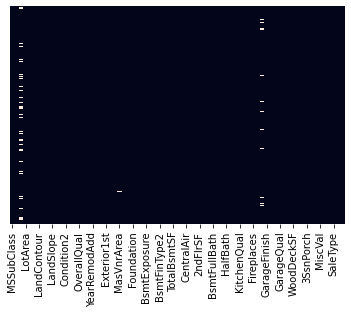

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)


In [18]:
train.columns[train.isnull().any()]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

<AxesSubplot:>

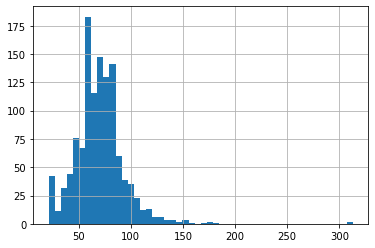

In [19]:
train['LotFrontage'].hist(bins = 50)

In [20]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Here we impute the missing values in this variable with values in between 25th percentile and 75th percentile randomly.

In [21]:
train['LotFrontage'].fillna(np.random.randint(59,80), inplace = True)

In [22]:
test['LotFrontage'].fillna(np.random.randint(59,80), inplace = True)

<AxesSubplot:>

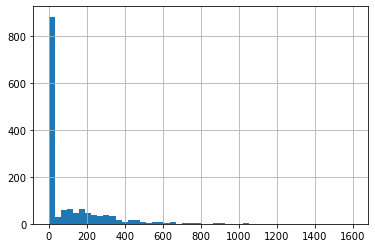

In [23]:
train['MasVnrArea'].hist(bins = 50)

In [24]:
train['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

Although the distribution is skewed mean and median values are both zero. Hence we will impute these missing values with zero.

In [25]:
train['MasVnrArea'].fillna(0, inplace = True)
test['MasVnrArea'].fillna(0, inplace = True)

We will remove the 'GarageYrBlt' variable. Since it is difficult to impute date values correctly.

In [26]:
train=train.drop(['GarageYrBlt'],1)
test=test.drop(['GarageYrBlt'],1)

In [27]:
features=[features for features in train.columns if train[features].isnull().sum()>1]
if len(features)==0:
    print("No missing values in training set")

No missing values in training set


In [28]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea',
       'SaleType'],
      dtype='object')

There are variables containing missing values although there were not in training set. Here we impute them using train set values.

In [29]:
test['MSZoning']=test['MSZoning'].fillna(train['MSZoning'].mode()[0])
test['Utilities']=test['Utilities'].fillna(train['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(train['BsmtFinSF1'].mean())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(train['BsmtFinSF2'].mean())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(train['BsmtUnfSF'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(train['TotalBsmtSF'].mean())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(train['BsmtFullBath'].mean())
test['KitchenQual']=test['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
test['Functional']=test['Functional'].fillna(train['Functional'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(train['GarageCars'].mean())
test['GarageArea']=test['GarageArea'].fillna(train['GarageArea'].mean())
test['SaleType']=test['SaleType'].fillna(train['SaleType'].mode()[0])
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(train['BsmtHalfBath'].mean())

In [30]:
features=[features for features in test.columns if test[features].isnull().sum()>1]
if len(features)==0:
    print("No missing values in test set")
else:
    print("there are missing values in test set")

No missing values in test set


Missing values have been imputed with different techniques and the variables with more than 20 percent missing values have been removed. 

Now, let's look at the correlations.

Since we have to predict the **'SalePrice'**, let's analyze it first.

In [31]:
# response/dependent variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

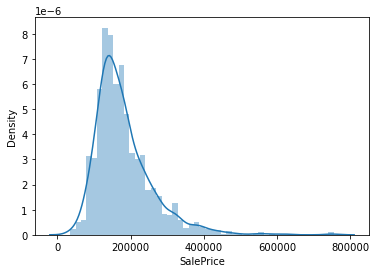

In [32]:
sns.distplot(train['SalePrice']);

**'SalePrice'-**
*   Deviate from the normal distribution
*   Have positive skewness


**'SalePrice' relationship with some important features**

When buying a house, the features we generally and most importantly consider are-

*   GrLivArea - Above grade (ground) living area square feet
*   TotalBsmtSF - Total square feet of basement area
*   OverallQual - Rates the overall material and finish of the house
*   YearBuilt - Original construction date

 **Correlations**


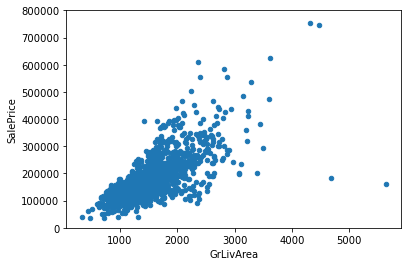

In [33]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

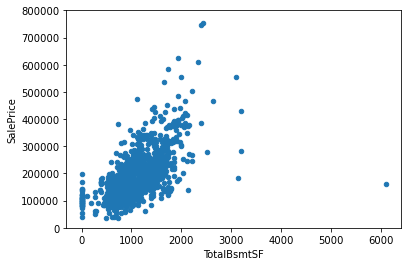

In [34]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


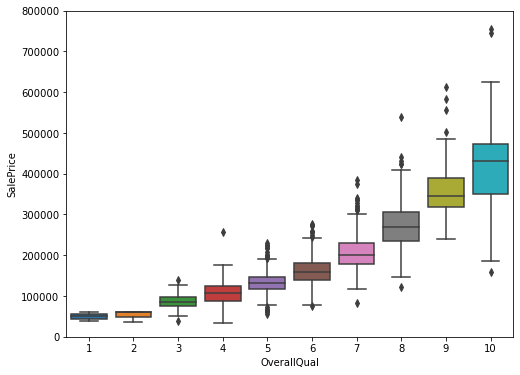

In [35]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

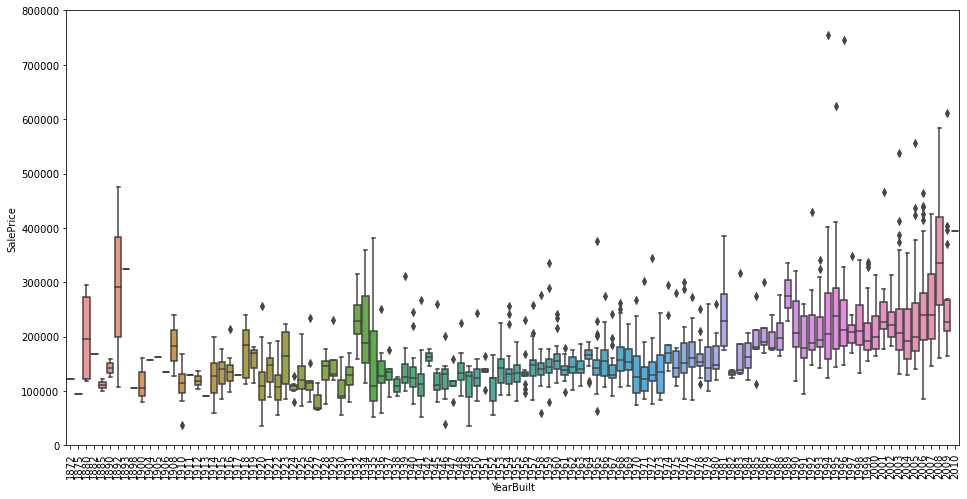

In [36]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

**From the above plots**
*   'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
*   'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.




**Heatmap correlation**

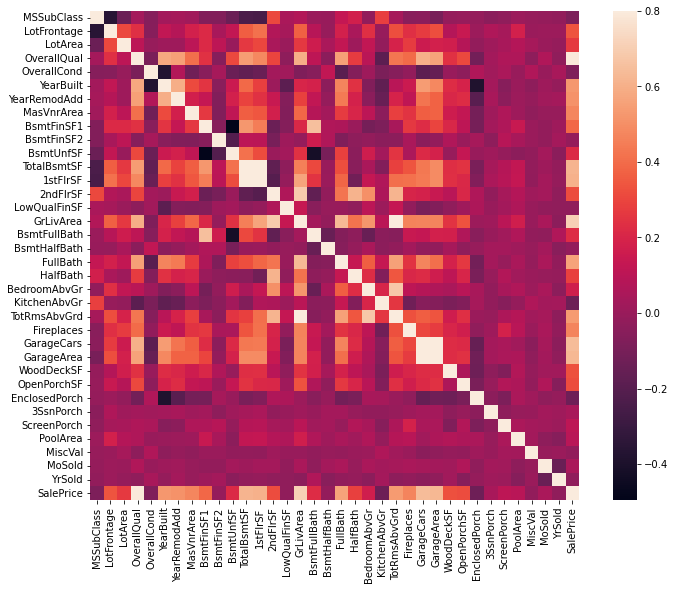

In [37]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

**From the heatmap, we find the follwing independent variables with high correlations indicating a situation of multicollinearity**
*   'TotRmsAbvGrd' and 'GrLivArea'
*   'TotalBsmtSF and 1stFlrSF' 
*   'GarageCars and GarageArea' 



**Feature Selection**

In [38]:
#Dropping one of these highly correlated varibales
train = train.drop(columns = ['TotRmsAbvGrd', '1stFlrSF','GarageArea'], axis = 1)
test = test.drop(columns = ['TotRmsAbvGrd', '1stFlrSF','GarageArea'], axis =1)

**Feature Engineering**

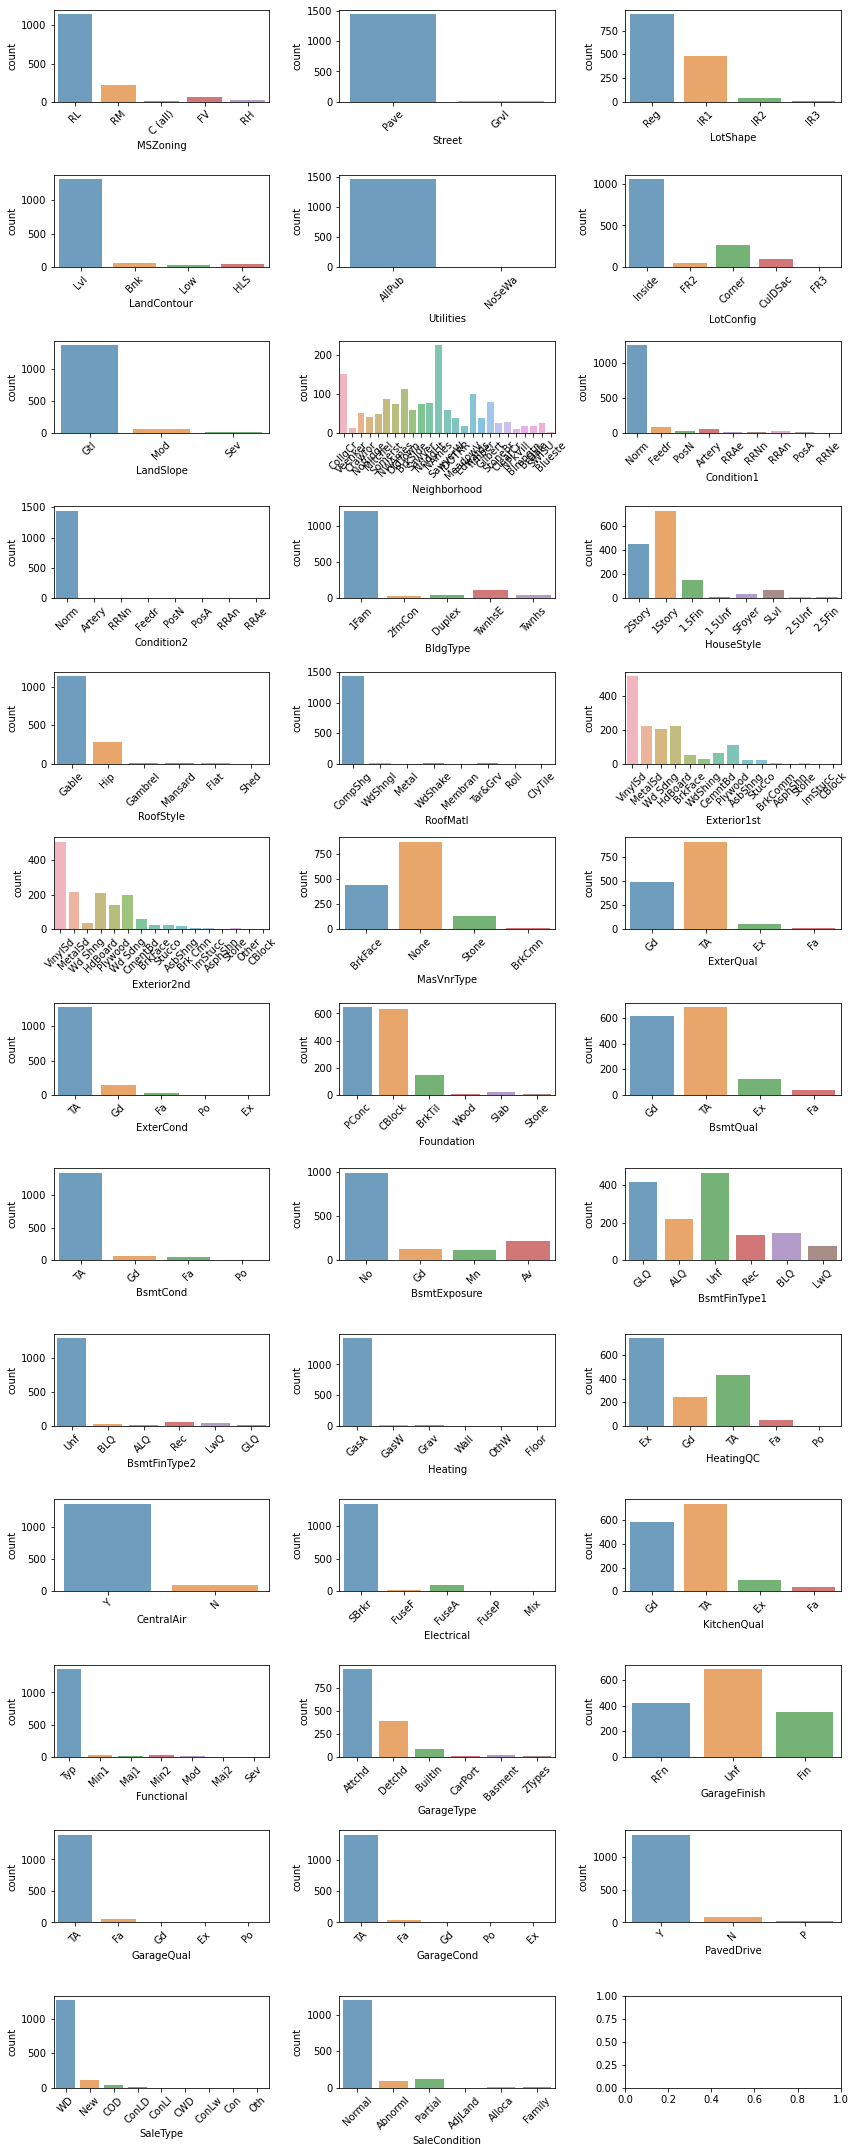

In [39]:
fig, axes = plt.subplots(round(len(categorical_cols_train.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_cols_train.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=categorical_cols_train.columns[i], alpha=0.7, data=categorical_cols_train, ax=ax)

fig.tight_layout()

We can see that in some variables some categories cannot be found in large numbers. Hence just one hot encoding may provide lot of variables which are not needed to the model. Hence we can try a different method rather than creating dummies for all categories.

In [40]:
for cols in categorical_cols_train.columns:
    print(cols,':', len(categorical_cols_train[cols].unique()),'labels')

MSZoning : 5 labels
Street : 2 labels
LotShape : 4 labels
LandContour : 4 labels
Utilities : 2 labels
LotConfig : 5 labels
LandSlope : 3 labels
Neighborhood : 25 labels
Condition1 : 9 labels
Condition2 : 8 labels
BldgType : 5 labels
HouseStyle : 8 labels
RoofStyle : 6 labels
RoofMatl : 8 labels
Exterior1st : 15 labels
Exterior2nd : 16 labels
MasVnrType : 4 labels
ExterQual : 4 labels
ExterCond : 5 labels
Foundation : 6 labels
BsmtQual : 4 labels
BsmtCond : 4 labels
BsmtExposure : 4 labels
BsmtFinType1 : 6 labels
BsmtFinType2 : 6 labels
Heating : 6 labels
HeatingQC : 5 labels
CentralAir : 2 labels
Electrical : 5 labels
KitchenQual : 4 labels
Functional : 7 labels
GarageType : 6 labels
GarageFinish : 3 labels
GarageQual : 5 labels
GarageCond : 5 labels
PavedDrive : 3 labels
SaleType : 9 labels
SaleCondition : 6 labels


For some variables there are more than 10 categories and some of them contain very few observations. So here we remove those variables and get the most frequent categories from those variables. This will reduce the dimensionality when creating dummy variables for categorical variables.

In [41]:
categorical_cols_train.Condition1.value_counts().sort_values(ascending=False)

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

We can see that although there are 9 categories many of them do not contain observations. So we will get only the most frequent four categories.

In [42]:
freq_labels= [x for x in categorical_cols_train.Condition1.value_counts().sort_values(ascending=False).head(4).index]
freq_labels

['Norm', 'Feedr', 'Artery', 'RRAn']

In [43]:
for label in freq_labels:
    categorical_cols_train[label]= np.where(categorical_cols_train['Condition1']==label,1,0)

In [44]:
categorical_cols_train[['Condition1']+freq_labels].head(10)

,Condition1,Norm,Feedr,Artery,RRAn
0,Norm,1,0,0,0
1,Feedr,0,1,0,0
2,Norm,1,0,0,0
3,Norm,1,0,0,0
4,Norm,1,0,0,0
5,Norm,1,0,0,0
6,Norm,1,0,0,0
7,PosN,0,0,0,0
8,Artery,0,0,1,0
9,Artery,0,0,1,0


In [45]:
def one_hot_freq_labels(data,variable,freq_labels):
    for label in freq_labels:
        data[variable+'_'+label]= np.where(data[variable]==label,1,0)

In [46]:
# the categories have been selected manually according to their frequencies

freq_labels_Condition1=[x for x in categorical_cols_train.Condition1.value_counts().sort_values(ascending=False).head(4).index]
freq_labels_Exterior2nd= [x for x in categorical_cols_train.Exterior2nd.value_counts().sort_values(ascending=False).head(5).index]
freq_labels_Condition2=[x for x in categorical_cols_train.Condition2.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_HouseStyle =[x for x in categorical_cols_train.HouseStyle .value_counts().sort_values(ascending=False).head(4).index]
freq_labels_RoofStyle =[x for x in categorical_cols_train.RoofStyle.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_RoofMatl  =[x for x in categorical_cols_train.RoofMatl.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_Exterior1st =[x for x in categorical_cols_train.Exterior1st.value_counts().sort_values(ascending=False).head(5).index]
freq_labels_MasVnrType =[x for x in categorical_cols_train.MasVnrType.value_counts().sort_values(ascending=False).head(3).index]

freq_labels_ExterQual =[x for x in categorical_cols_train.ExterQual.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_ExterCond =[x for x in categorical_cols_train.ExterCond.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_Foundation =[x for x in categorical_cols_train.Foundation.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_BsmtQual =[x for x in categorical_cols_train.BsmtQual.value_counts().sort_values(ascending=False).head(4).index]
freq_labels_BsmtCond =[x for x in categorical_cols_train.BsmtCond.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_BsmtExposure =[x for x in categorical_cols_train.BsmtExposure.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_BsmtFinType1=[x for x in categorical_cols_train.BsmtFinType1.value_counts().sort_values(ascending=False).head(6).index]

freq_labels_BsmtFinType2 =[x for x in categorical_cols_train.BsmtFinType2.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_Heating =[x for x in categorical_cols_train.Heating.value_counts().sort_values(ascending=False).head(1).index]
freq_labels_HeatingQC =[x for x in categorical_cols_train.HeatingQC.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_CentralAir =[x for x in categorical_cols_train.BsmtExposure.value_counts().sort_values(ascending=False).head(1).index]
freq_labels_Electrical=[x for x in categorical_cols_train.BsmtFinType1.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_KitchenQual=[x for x in categorical_cols_train.KitchenQual.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_Functional =[x for x in categorical_cols_train.Functional.value_counts().sort_values(ascending=False).head(2).index]

freq_labels_GarageType =[x for x in categorical_cols_train.GarageType.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_GarageFinish =[x for x in categorical_cols_train.GarageFinish.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_GarageQual=[x for x in categorical_cols_train.GarageQual.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_GarageCond=[x for x in categorical_cols_train.GarageCond.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_PavedDrive =[x for x in categorical_cols_train.PavedDrive.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_SaleType =[x for x in categorical_cols_train.SaleType.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_SaleCondition =[x for x in categorical_cols_train.SaleCondition.value_counts().sort_values(ascending=False).head(3).index]

freq_labels_MSZoning =[x for x in categorical_cols_train.MSZoning.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_Street =[x for x in categorical_cols_train.Street.value_counts().sort_values(ascending=False).head(1).index]
freq_labels_LotShape=[x for x in categorical_cols_train.LotShape.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_LandContour=[x for x in categorical_cols_train.LandContour.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_Utilities =[x for x in categorical_cols_train.Utilities.value_counts().sort_values(ascending=False).head(1).index]
freq_labels_LotConfig =[x for x in categorical_cols_train.LotConfig.value_counts().sort_values(ascending=False).head(3).index]
freq_labels_LandSlope =[x for x in categorical_cols_train.LandSlope.value_counts().sort_values(ascending=False).head(2).index]
freq_labels_BldgType=[x for x in categorical_cols_train.BldgType.value_counts().sort_values(ascending=False).head(3).index]




Now we will combine test and train sets before creating dummy varaibles since there may be differences in columns if that was done seperately.

In [47]:
df=pd.concat([train,test],axis=0)

In [48]:
one_hot_freq_labels(df,'Exterior2nd',freq_labels_Exterior2nd)
one_hot_freq_labels(df,'Condition1',freq_labels_Condition1)
one_hot_freq_labels(df,'Condition2',freq_labels_Condition2)
one_hot_freq_labels(df,'HouseStyle',freq_labels_HouseStyle)
one_hot_freq_labels(df,'RoofStyle',freq_labels_RoofStyle)
one_hot_freq_labels(df,'RoofMatl',freq_labels_RoofMatl )
one_hot_freq_labels(df,'Exterior1st',freq_labels_Exterior1st)
one_hot_freq_labels(df,'MasVnrType',freq_labels_MasVnrType)
one_hot_freq_labels(df,'ExterQual',freq_labels_ExterQual)
one_hot_freq_labels(df,'ExterCond',freq_labels_ExterCond )
one_hot_freq_labels(df,'Foundation',freq_labels_Foundation)
one_hot_freq_labels(df,'BsmtQual',freq_labels_BsmtQual)
one_hot_freq_labels(df,'BsmtCond',freq_labels_BsmtCond)
one_hot_freq_labels(df,'BsmtExposure',freq_labels_BsmtExposure)
one_hot_freq_labels(df,'BsmtFinType1',freq_labels_BsmtFinType1)
one_hot_freq_labels(df,'BsmtFinType2',freq_labels_BsmtFinType2 )
one_hot_freq_labels(df,'Heating',freq_labels_Heating)
one_hot_freq_labels(df,'HeatingQC',freq_labels_HeatingQC)
one_hot_freq_labels(df,'CentralAir',freq_labels_CentralAir)
one_hot_freq_labels(df,'Electrical',freq_labels_Electrical)
one_hot_freq_labels(df,'KitchenQual',freq_labels_KitchenQual)
one_hot_freq_labels(df,'Functional',freq_labels_Functional)
one_hot_freq_labels(df,'GarageType',freq_labels_GarageType)
one_hot_freq_labels(df,'GarageFinish',freq_labels_GarageFinish)
one_hot_freq_labels(df,'GarageQual',freq_labels_GarageQual)
one_hot_freq_labels(df,'GarageCond',freq_labels_GarageCond)
one_hot_freq_labels(df,'PavedDrive',freq_labels_PavedDrive)
one_hot_freq_labels(df,'SaleType',freq_labels_SaleType)
one_hot_freq_labels(df,'SaleCondition',freq_labels_SaleCondition)


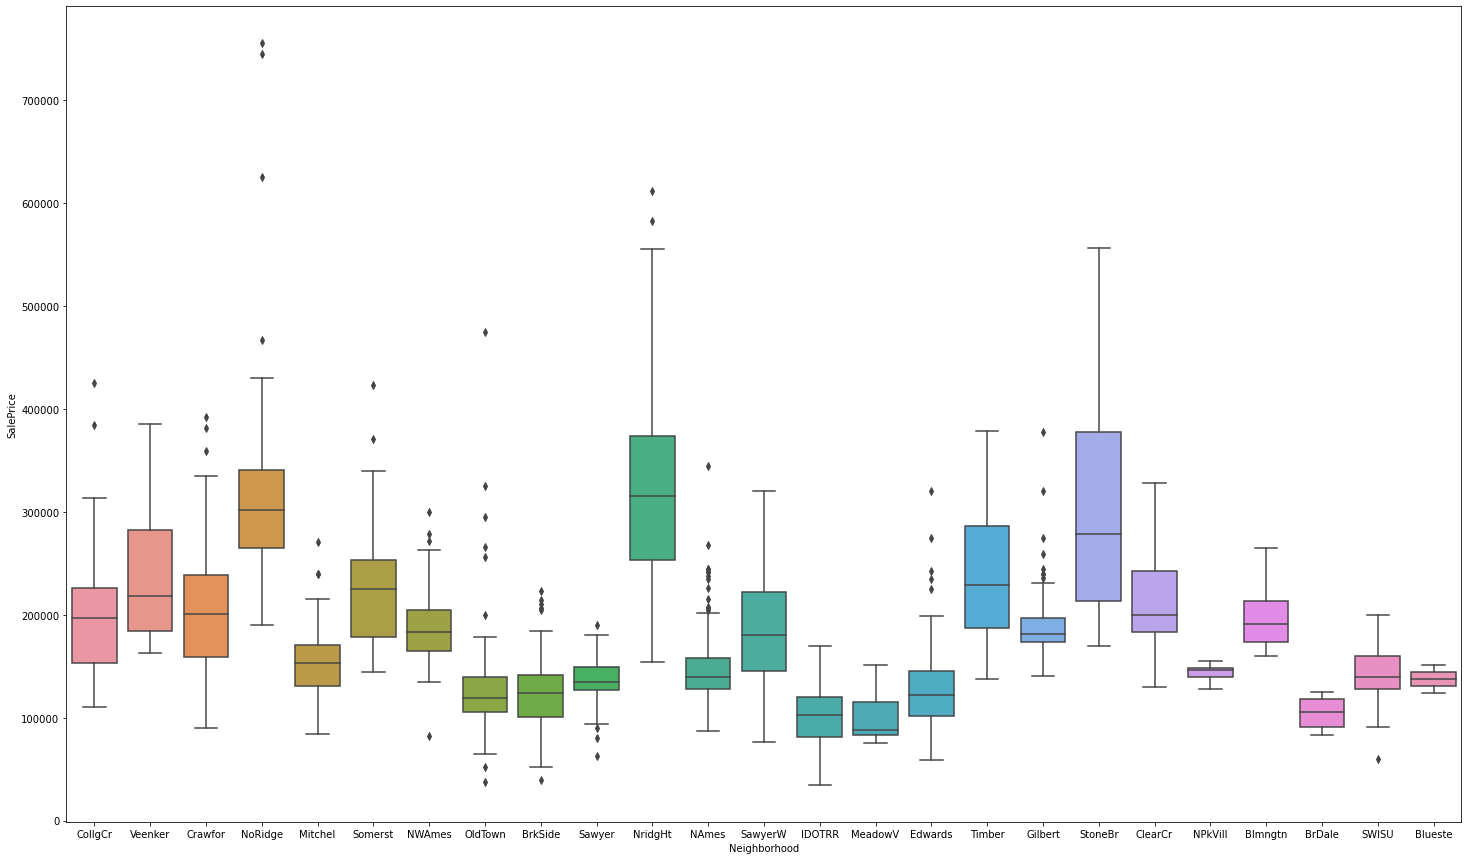

In [49]:
data = pd.concat([train['SalePrice'], train['Neighborhood']], axis=1)
f, ax = plt.subplots(figsize=(25, 15))
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=data)


Since there is a price variation among neighborhoods. We will create dummies for most frequent 10 neighborhoods. 

In [50]:
freq_labels_Neighborhood =[x for x in categorical_cols_train.Neighborhood.value_counts().sort_values(ascending=False).head(8).index]
freq_labels_Neighborhood
one_hot_freq_labels(df,'Neighborhood',freq_labels_Neighborhood)

Now we can remove the original categorical variables from the dataframe.

In [51]:
df=df.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],1)

In [52]:
df.shape

(2919, 125)

In [53]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Partial,SaleCondition_Abnorml,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_Gilbert,Neighborhood_NridgHt,Neighborhood_Sawyer
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df['SalePrice'].isnull().sum()

1459

In [55]:
df_train=df.iloc[:1460,:]
df_test=df.iloc[1460:,:]

<AxesSubplot:>

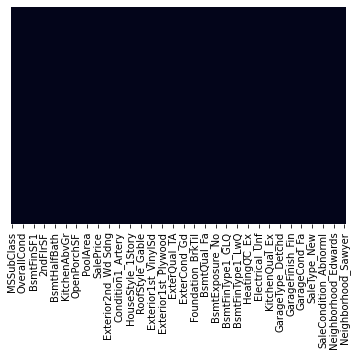

In [56]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:>

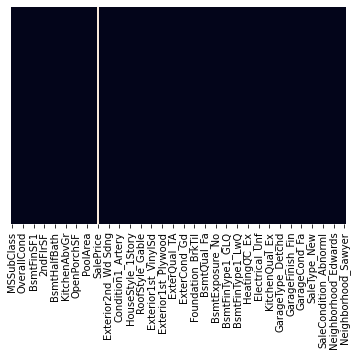

In [57]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

### **Model Fitting**

In [58]:
X = df_train.drop(['SalePrice'], axis =1)
y = np.log(df_train.SalePrice) #since the 'SalePrice' is positively skewed


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=1234, test_size= .2)

In [60]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleCondition_Partial,SaleCondition_Abnorml,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Somerst,Neighborhood_Gilbert,Neighborhood_NridgHt,Neighborhood_Sawyer
503,20,100.0,15602,7,8,1959,1997,0.0,1247.0,0.0,...,0,0,0,0,0,0,0,0,0,0
87,160,40.0,3951,6,5,2009,2009,76.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
500,160,21.0,1890,6,5,1973,1973,285.0,356.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1332,20,67.0,8877,4,6,1938,1958,0.0,690.0,0.0,...,0,0,0,0,0,1,0,0,0,0
658,50,78.0,17503,6,5,1948,1950,0.0,0.0,0.0,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,120,65.0,8769,9,5,2008,2008,766.0,1540.0,0.0,...,1,0,0,0,0,0,0,0,1,0
1077,20,70.0,15870,5,5,1969,1969,0.0,75.0,791.0,...,0,1,1,0,0,0,0,0,0,0
1318,20,70.0,14781,8,5,2001,2002,178.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
723,50,60.0,8172,4,6,1954,1972,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [61]:
from sklearn import metrics

def model_scores(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')





In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [63]:
lr= LinearRegression()
lr.fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("\n_____________________________________")
test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.91
Test set score: 0.84

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.10971281591514248
MSE: 0.027513283328556078
RMSE: 0.16587128542504298
R2 Square 0.8385996586863312
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.08487745687807621
MSE: 0.014579750875206883
RMSE: 0.12074663918804068
R2 Square 0.9069203839206387
__________________________________


In [64]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("\n_____________________________________")
test_pred = lasso.predict(X_test)
train_pred = lasso.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.79
Test set score: 0.75

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.1322919739717586
MSE: 0.04341524391579113
RMSE: 0.2083632499165607
R2 Square 0.7453144685588271
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.11967164371244045
MSE: 0.03282695690706277
RMSE: 0.18118210978753607
R2 Square 0.7904271086580015
__________________________________


In [65]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(random_state=2)
enet.fit(X_train, y_train)
print("Training set score: {:.2f}".format(enet.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(enet.score(X_test, y_test)))
print("\n_____________________________________")
test_pred = enet.predict(X_test)
train_pred = enet.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.78
Test set score: 0.76

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.13092661845950512
MSE: 0.041227179102559755
RMSE: 0.20304477117758968
R2 Square 0.758150246951929
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.12011351209958043
MSE: 0.03430811939288638
RMSE: 0.18522451077782978
R2 Square 0.7809711147448231
__________________________________


In [66]:
dt= DecisionTreeRegressor()
dt.fit(X_train, y_train)
print("Training set score: {:.2f}".format(dt.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(dt.score(X_test, y_test)))
print("\n_____________________________________")
test_pred = dt.predict(X_test)
train_pred = dt.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 1.00
Test set score: 0.71

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.15488208319602853
MSE: 0.0496815357800324
RMSE: 0.22289355257618468
R2 Square 0.7085547102420182
__________________________________
Train set evaluation:
_____________________________________
MAE: 4.562560375171876e-18
MSE: 8.104735327613135e-33
RMSE: 9.002630353187415e-17
R2 Square 1.0
__________________________________


In [67]:
bg= BaggingRegressor(random_state=5)
bg.fit(X_train, y_train)
print("Training set score: {:.2f}".format(bg.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(bg.score(X_test, y_test)))
print("\n_____________________________________")
test_pred = bg.predict(X_test)
train_pred = bg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.97
Test set score: 0.83

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.10828036785512972
MSE: 0.029084038745845642
RMSE: 0.17054043141098724
R2 Square 0.8293851837200629
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.04300646492772637
MSE: 0.003990303472868799
RMSE: 0.06316884891201358
R2 Square 0.9745252221060671
__________________________________


In [68]:
gbm= GradientBoostingRegressor(random_state=123)
gbm.fit(X_train, y_train)
print("Training set score: {:.2f}".format(gbm.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(gbm.score(X_test, y_test)))
print("\n_____________________________________")
test_pred = gbm.predict(X_test)
train_pred =gbm.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.96
Test set score: 0.86

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.09655568845085538
MSE: 0.02407895952502297
RMSE: 0.15517396535831315
R2 Square 0.8587463284767953
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05815125623754268
MSE: 0.0059502067493660635
RMSE: 0.07713758324815513
R2 Square 0.9620128653387598
__________________________________


In [69]:
rf= RandomForestRegressor(random_state=5)
rf.fit(X_train, y_train)
print("Training set score: {:.2f}".format(rf.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(rf.score(X_test, y_test)))
print("\n_____________________________________")
test_pred = rf.predict(X_test)
train_pred =rf.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.98
Test set score: 0.85

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.1022119247782257
MSE: 0.026047971184513668
RMSE: 0.16139383874396715
R2 Square 0.8471955749699411
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.03613335493853309
MSE: 0.0026833030651177772
RMSE: 0.05180060873308129
R2 Square 0.9828693356104967
__________________________________


In [70]:
from sklearn.ensemble import AdaBoostRegressor
ada= AdaBoostRegressor(random_state=5)
ada.fit(X_train, y_train)
print("Training set score: {:.2f}".format(ada.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ada.score(X_test, y_test)))
print("\n_____________________________________")
test_pred = ada.predict(X_test)
train_pred =ada.predict(X_train)

print('Test set evaluation:\n_____________________________________')
model_scores(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
model_scores(y_train, train_pred)

Training set score: 0.87
Test set score: 0.80

_____________________________________
Test set evaluation:
_____________________________________
MAE: 0.12822431832216666
MSE: 0.033847797047488346
RMSE: 0.18397770801781488
R2 Square 0.8014396925680511
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.1153383871932556
MSE: 0.019938666070064937
RMSE: 0.14120434154113298
R2 Square 0.8727081553847266
__________________________________


From above models, **GradientBoostingRegressor** is the best fit model since it has the highest R squared value.